# Load Libraries

In [1]:
# plotting
import matplotlib.pyplot as plt

# manipulate data
import pandas as pd

# more plotting
import seaborn as sns

# library to access google trends
from pytrends.request import TrendReq

# make pandas types compatibile with matplotlibs
pd.plotting.register_matplotlib_converters()

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={"x": 0.05, "xanchor": "left"},
)

sns_dict = {
    "axes.facecolor": "1",
    "grid.color": "0.9",
    "font.family": ["sans-serif"],
    "font.sans-serif": [
        "Yanone Kaffeesatz",
        "DejaVu Sans"
    ],
}

sns.set_style(style="whitegrid", rc=sns_dict)
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100

# Load Data

In [68]:
draghi_daily_2020_pytrends = pd.read_csv("../02-data/python/retrieved-daily-mario_draghi-pytrends-until_2020.csv", index_col=[0], parse_dates=[0])
draghi_daily_2020_overlap = pd.read_csv("../02-data/python/retrieved-daily-mario_draghi-overlap-until_2020.csv", index_col=[0], parse_dates=[0])
draghi_monthly_2020 = pd.read_csv("../02-data/python/gtrends-monthly-mario_draghi-until_2020.csv", index_col=[0], parse_dates=[0])

# Visualisations

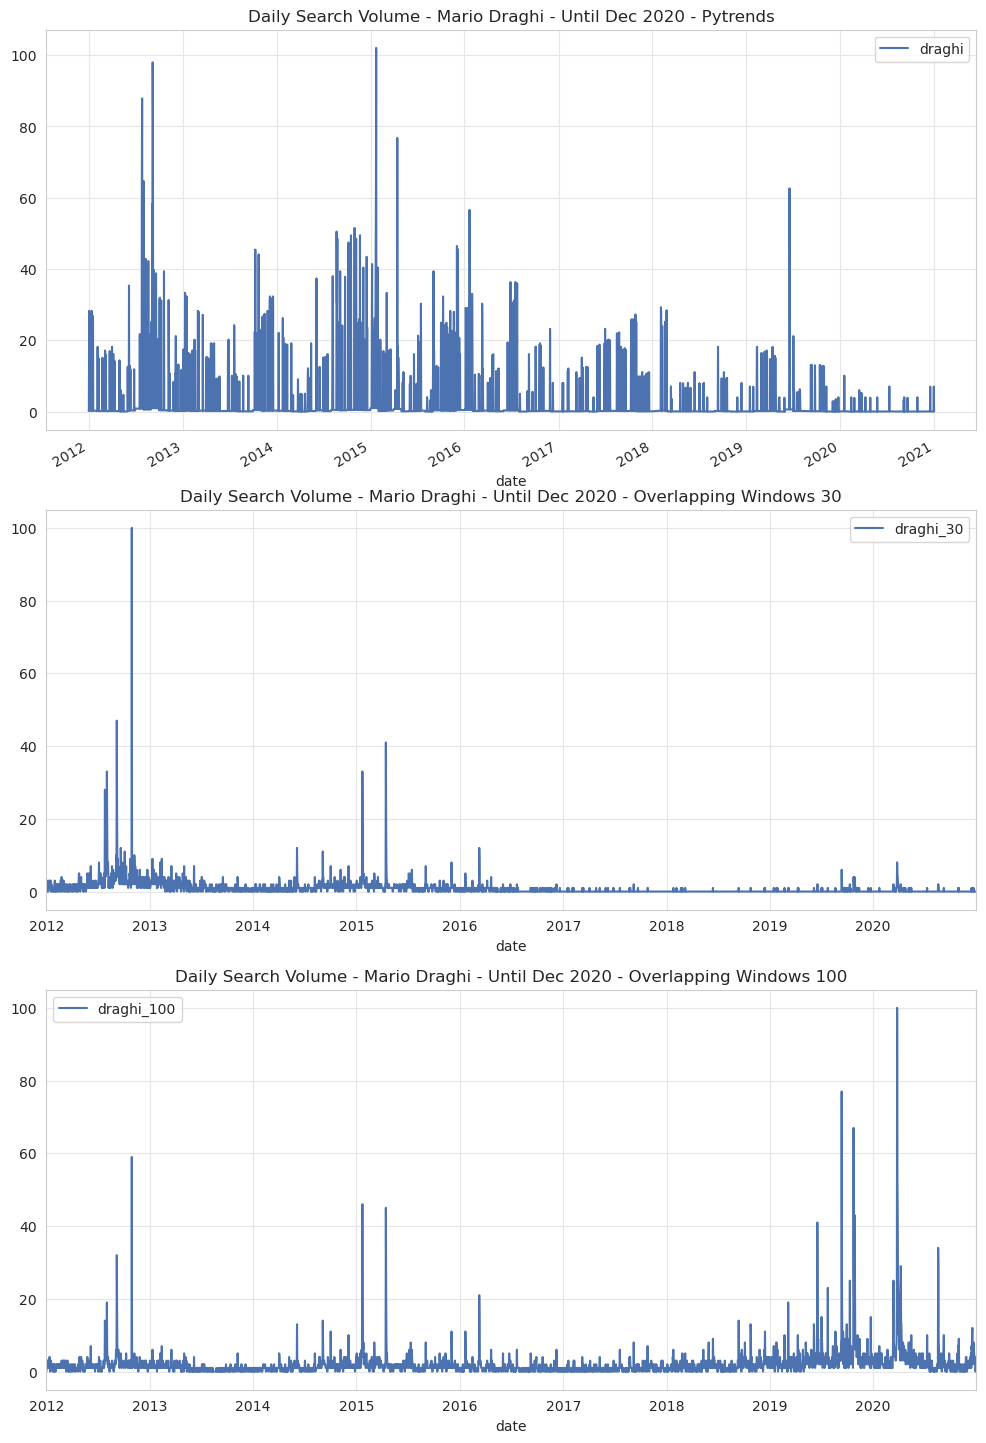

In [76]:
fig, ax = plt.subplots(3, 1, figsize=(12, 20))

draghi_daily_2020_pytrends.plot(
    y=["draghi"],
    kind="line",
    title="Daily Search Volume - Mario Draghi - Until Dec 2020 - Pytrends",
    ax=ax[0],
)
draghi_daily_2020_overlap.plot(
    y=["draghi_30"],
    kind="line",
    title="Daily Search Volume - Mario Draghi - Until Dec 2020 - Overlapping Windows 30",
    ax=ax[1],
)
draghi_daily_2020_overlap.plot(
    y=["draghi_100"],
    kind="line",
    title="Daily Search Volume - Mario Draghi - Until Dec 2020 - Overlapping Windows 100",
    ax=ax[2],
)

plt.show()

Now we resample this data to monthly and compare it with the official monthly data:

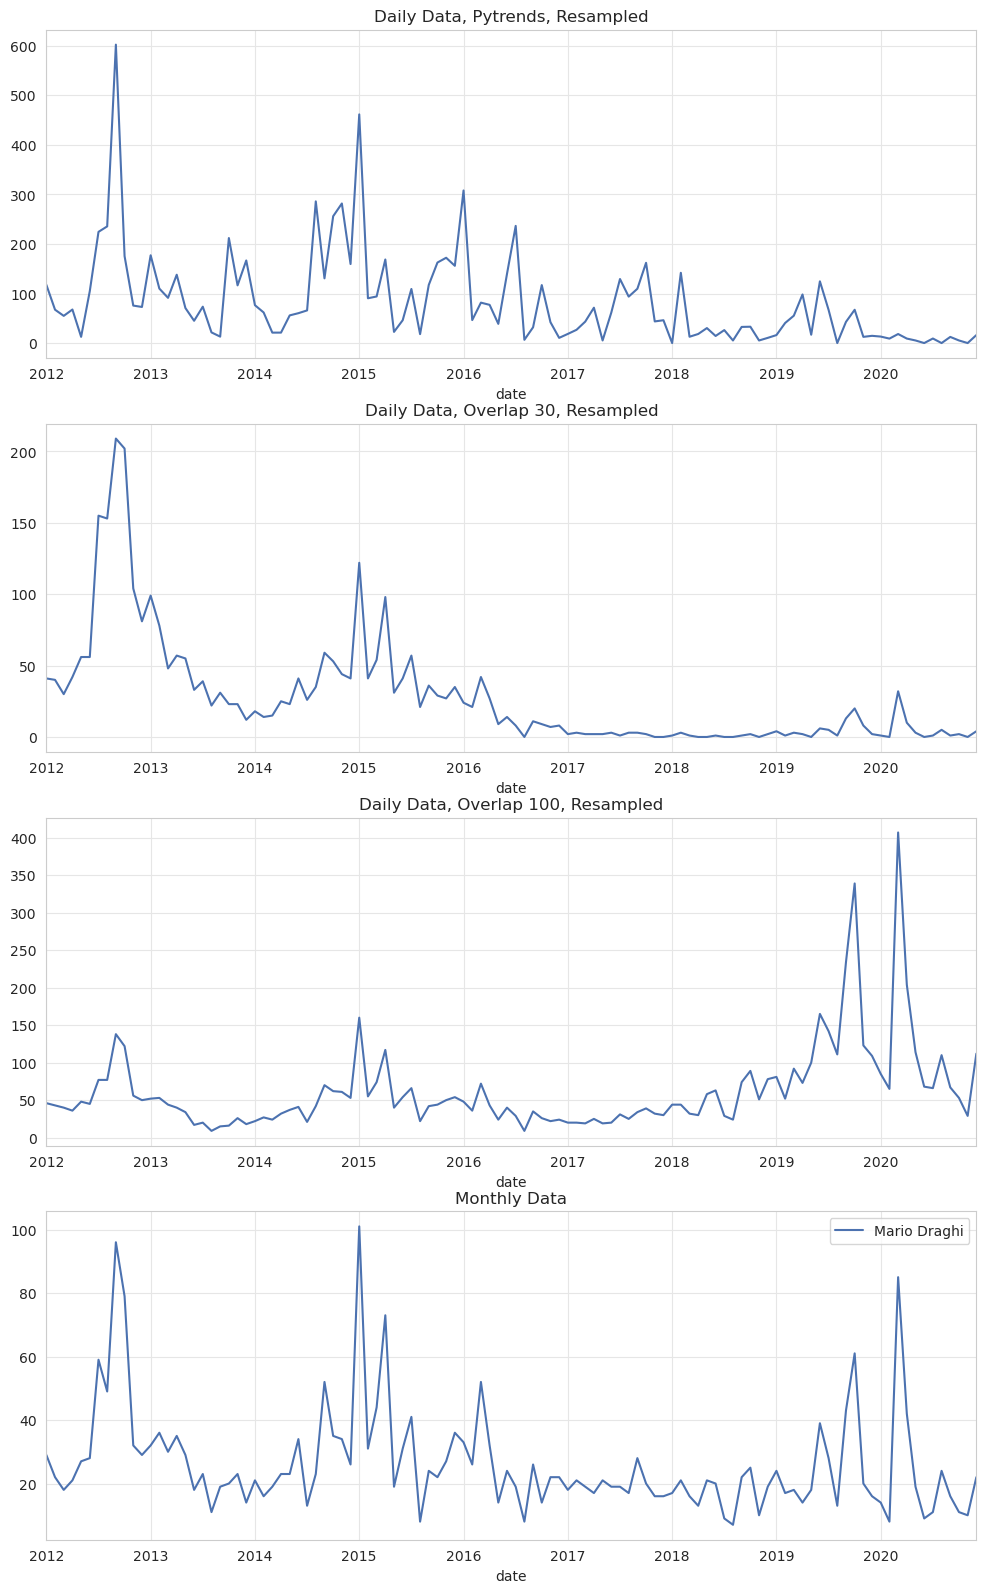

In [80]:
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# pytrends data
(
    draghi_daily_2020_pytrends["draghi"]
    .resample("MS")
    .sum()
    .plot(
        title="Daily Data, Pytrends, Resampled", ax=ax[0]
    )
)

# overlap 30
(
    draghi_daily_2020_overlap["draghi_30"]
    .resample("MS")
    .sum()
    .plot(
        title="Daily Data, Overlap 30, Resampled", ax=ax[1]
    )
)

# overlap 100
(
    draghi_daily_2020_overlap["draghi_100"]
    .resample("MS")
    .sum()
    .plot(
        title="Daily Data, Overlap 100, Resampled", ax=ax[2]
    )
)

# monthly data from google trends
draghi_monthly_2020.plot(y="Mario Draghi", title="Monthly Data", ax=ax[3])

plt.show()

# Weekly Data

This is a bit more problematic: as it is retrieved in two pieces, we need to rescale them.

In [8]:
draghi_weekly_01 = pd.read_csv(
    "../02-data/python/gtrends-weekly-mario_draghi-01.csv",
    parse_dates=[0],
    index_col=[0],
    skiprows=2,
    squeeze=True,
).asfreq(freq="W")

draghi_weekly_02 = pd.read_csv(
    "../02-data/python/gtrends-weekly-mario_draghi-02.csv",
    parse_dates=[0],
    index_col=[0],
    skiprows=2,
    squeeze=True,
).asfreq(freq="W")

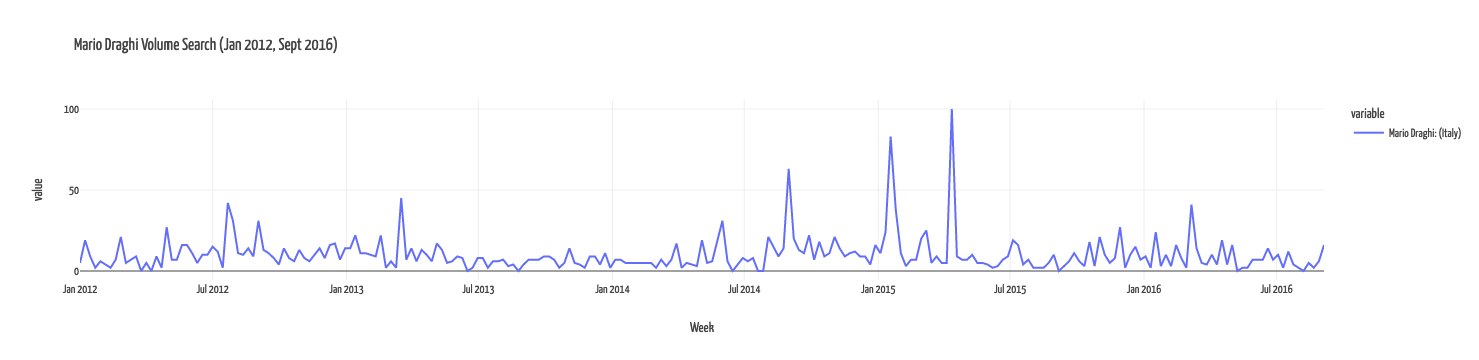

In [9]:
draghi_weekly_01.plot(
    title="Mario Draghi Volume Search (Jan 2012, Sept 2016)"
).update_layout(**plotly_dict)

The second data is of mixed types, we need to turn them into integers.

In [49]:
draghi_weekly_01 = draghi_weekly_01 + 1

draghi_weekly_02 = draghi_weekly_02.str.replace("<1", "0").astype("int") + 1

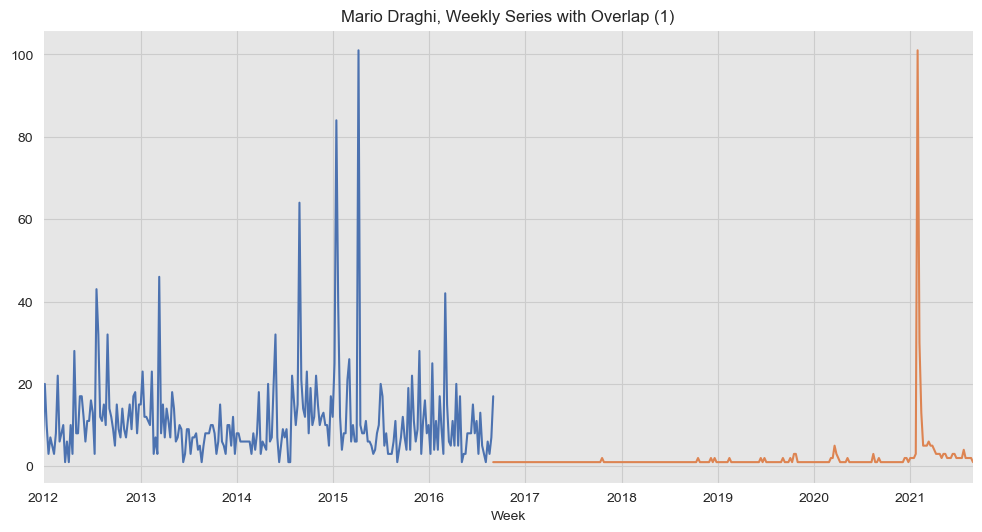

In [59]:
pd.options.plotting.backend = "matplotlib"

fig, ax = plt.subplots()

ax = draghi_weekly_01.plot()
ax = draghi_weekly_02.plot()

plt.title("Mario Draghi, Weekly Series with Overlap (1)")

plt.show()

# Overlap Months and Weeks

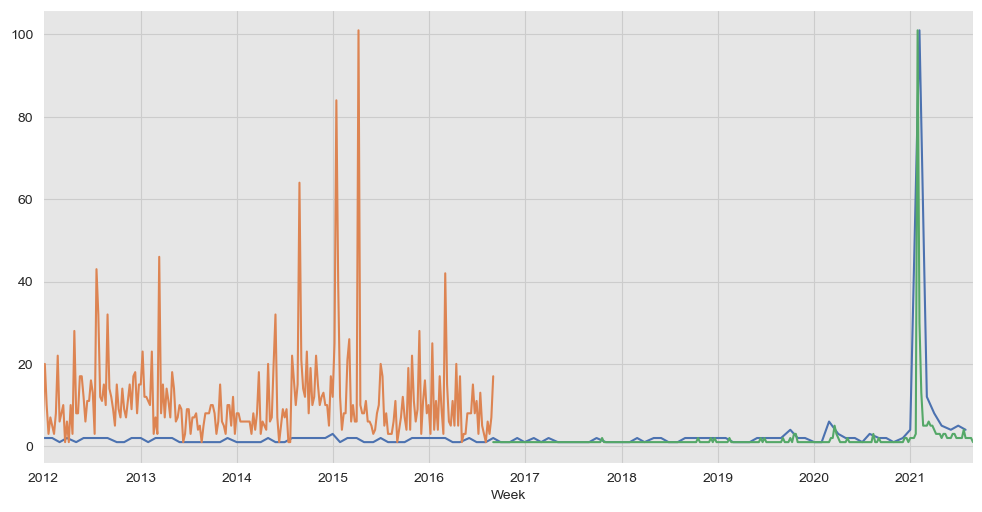

In [66]:
fig, ax = plt.subplots(1, 1)

ax = draghi_monthly.plot()
ax = draghi_weekly_01.plot()
ax = draghi_weekly_02.plot()

# Retrieved Data

In [20]:
draghi_retrieved = pd.read_csv(
    "../02-data/python/retrieved-daily-mario_draghi.csv", parse_dates=[0], index_col=[0]
)